#### Seaborn - 고급그래프
: Matplotlib의 기능과 스타일을 확장한 파이썬 시각 도구의 고급 버전

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

import warnings
warnings.filterwarnings('ignore')

In [2]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 회귀선이 있는 산점도 (판단 기준을 잡을 수 있음)

In [3]:
# 스타일 테마 설정 : darkgrid, whitegrid, dark, white, ticks
sns.set_style('darkgrid')


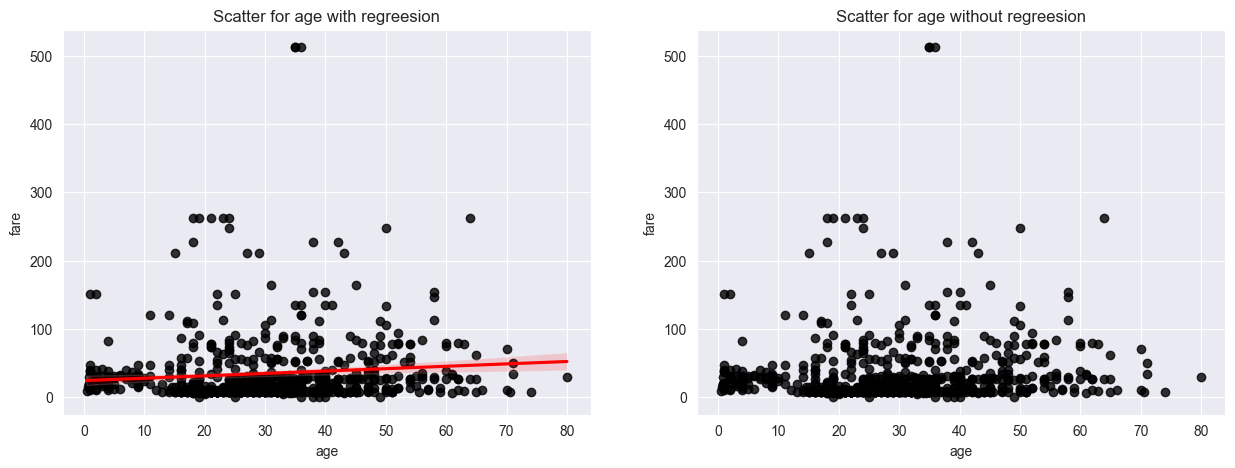

In [4]:
fig = plt.figure(figsize = (15,5))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 그래프 그리기 : 선형회귀선
sns.regplot( # regreesive?
    x = 'age',
    y = 'fare',
    data = titanic,
    ax = ax1,
    scatter_kws={'color':'black'}, 
    line_kws={'color':'red'}, # 빨간선 주변 흐린 빨강의 넓이가 클수록 오차가 크다(정비례).
)  # 회귀선의 각도가 낮을땐 관련도가 없다. 회귀선 = 평균선

# 그래프 그리기 : 선형회귀선 미표시

sns.regplot(
     x = 'age',
    y = 'fare',
    data = titanic,
    ax = ax2,
    scatter_kws={'color':'black'}, 
    line_kws={'color':'red'},
    fit_reg=False # fit (학습하다) ex) fit_regression -> 주관식으로 학습하겠냐? : True / False
)
# regression 회귀 y = ax +b  -> 주관식   
# classification 분류 -> 객관식 : AI는 객관식에 능함. 카테고리를 잘 만들수록 좋음


# 제목
ax1.set_title("Scatter for age with regreesion")
ax2.set_title("Scatter for age without regreesion")


plt.show()


---
#### 히스토그램/커널 밀도 그래프
- 커널 밀도 함수는 그래프와 x축 사이의 면적이 1이 되도록 그리는 밀도 분포 함수

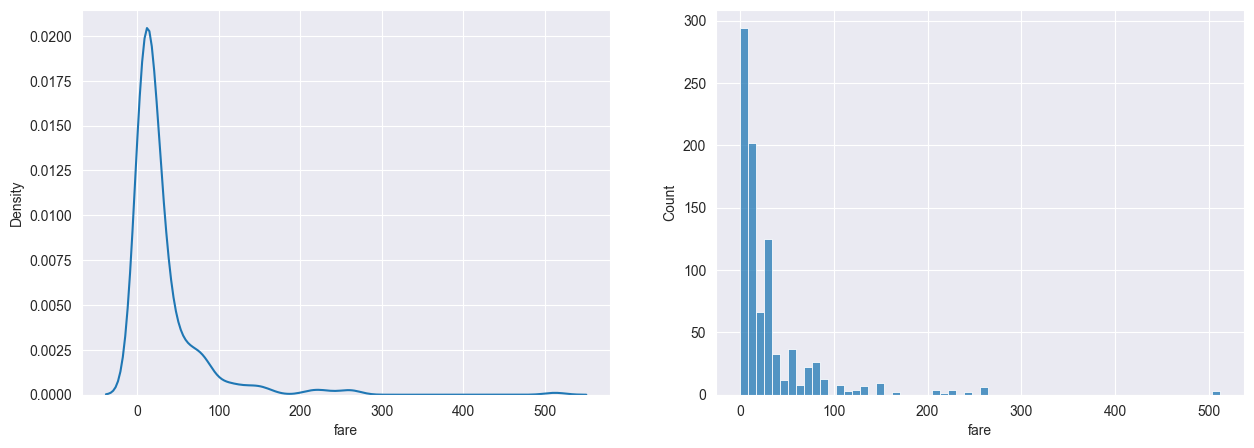

In [5]:
fig = plt.figure(figsize = (15,5))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)


# 커널 밀도 : kdeplot
sns.kdeplot(
    x = 'fare',
    data = titanic,
    ax = ax1
)

# 히스토그램 : histplot
sns.histplot(
    x = 'fare',
    data = titanic,
    ax = ax2
)
# 결정할 때 사용하는 그래프

plt.show()

---
#### 히트맵(heatmap)

In [6]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
# 성별, 티켓등급별 count
table = \
    titanic.pivot_table(
        columns = 'class', 
        index = 'sex',
        aggfunc = 'size'   # 피봇에서 count 구하는건 size
    )
table

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


In [8]:
titanic.groupby(['sex', 'class']).size()

sex     class 
female  First      94
        Second     76
        Third     144
male    First     122
        Second    108
        Third     347
dtype: int64

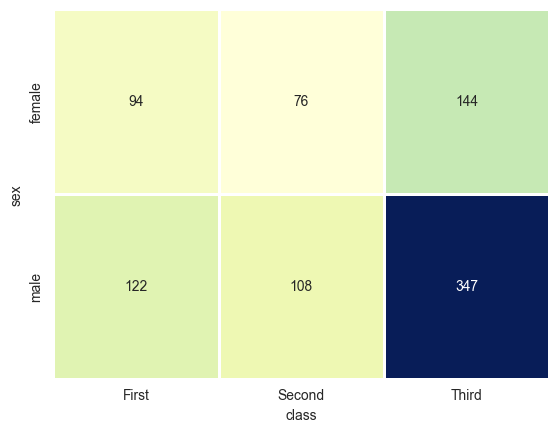

In [9]:
sns.heatmap(   # 테이들들의 상관계수에서 많이 쓰임
    table,
    annot = True, # 지수
    fmt = 'd',  # 정수
    cmap = 'YlGnBu',  # 컬러
    linewidths=1,
    cbar = False  # 오른쪽 바
)

plt.show()

---
### 범주형 데이터의 산점도

In [10]:
sns.set_style('whitegrid')   

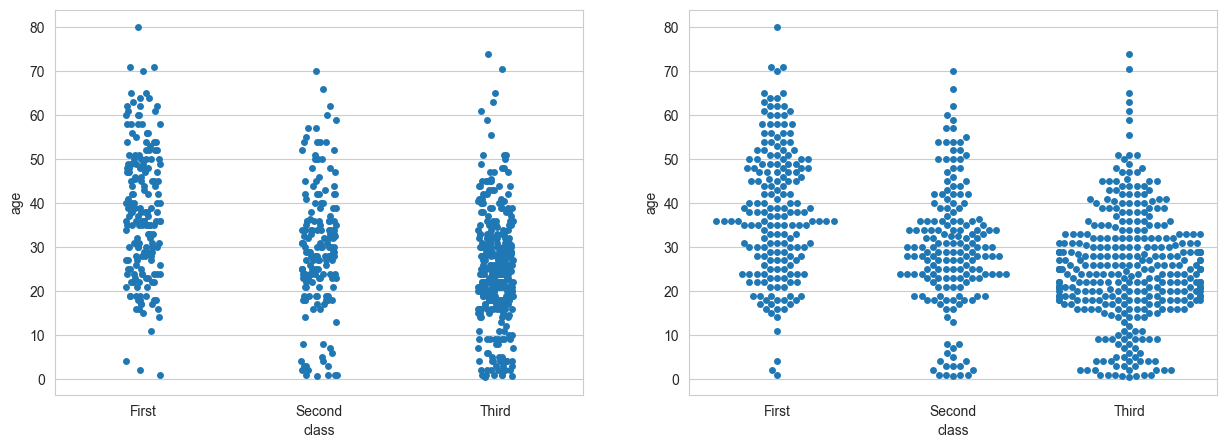

In [11]:
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)


sns.stripplot(
    x = 'class',
    y='age',
    data = titanic,
    ax = ax1
)

sns.swarmplot(
    x = 'class',
    y='age',
    data = titanic,
    ax = ax2
)


plt.show()

---
#### 막대 그래프

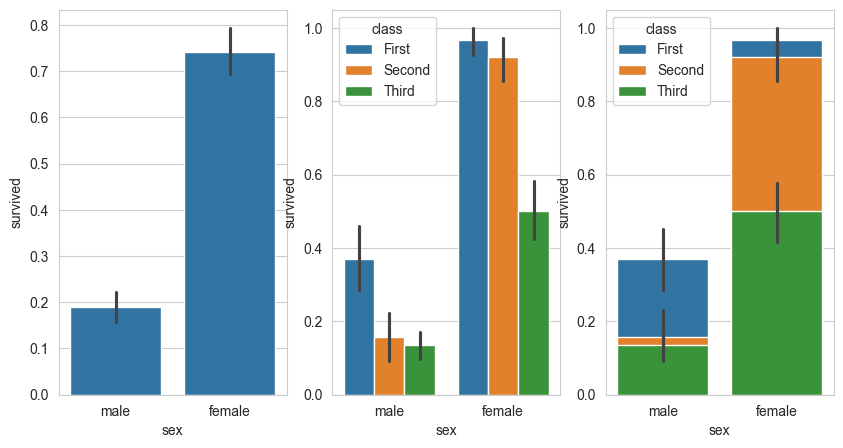

In [12]:
fig = plt.figure(figsize = (10,5))

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.barplot(
    x = 'sex',
    y = 'survived',
    data=titanic,
    ax = ax1
)

sns.barplot(
    x = 'sex',
    y = 'survived',
    data=titanic,
    hue = 'class',
    ax = ax2
)

sns.barplot(
    x = 'sex',
    y = 'survived',
    data=titanic,
    hue = 'class',
    dodge = False,
    ax = ax3
)


plt.show()

---
#### 빈도그래프

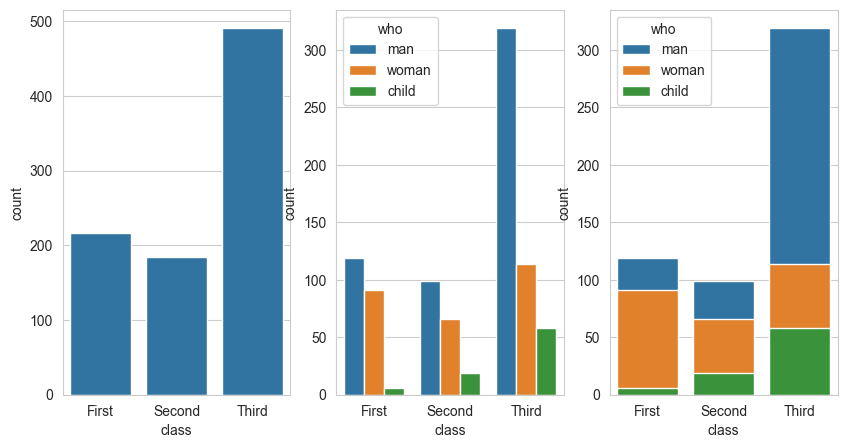

In [20]:
fig = plt.figure(figsize = (10,5))

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.countplot(
    x = 'class',
    # y = 'survived',
    data=titanic,
    ax = ax1
)

sns.countplot(
    x = 'class',
    data=titanic,
    hue = 'who',
    ax = ax2
)

sns.countplot(
    x = 'class',
    data=titanic,
    hue = 'who',
    dodge = False,
    ax = ax3
)


plt.show()

---
#### 박스플롯 / 바이올린 플롯

<Axes: xlabel='alive', ylabel='age'>

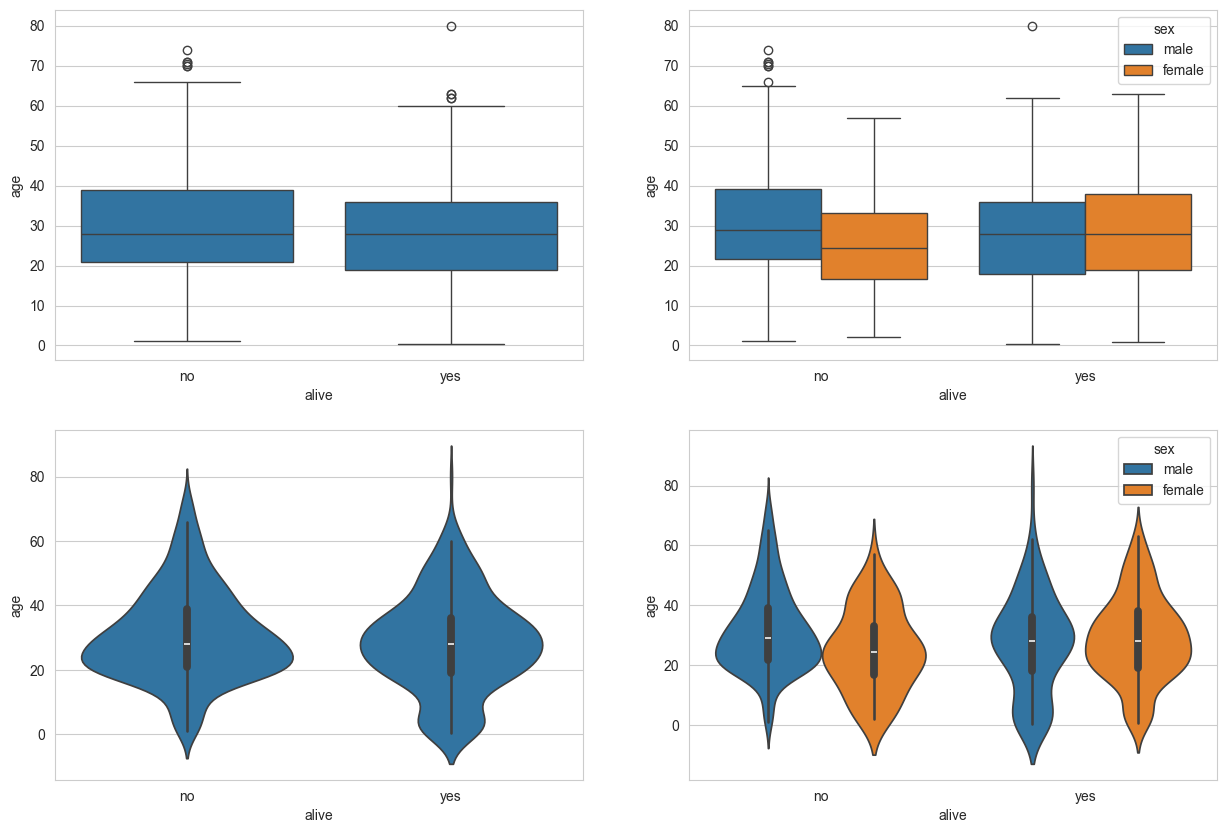

In [ ]:
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(2,2,1) 
ax2 = fig.add_subplot(2,2,2) 
ax3 = fig.add_subplot(2,2,3) 
ax4 = fig.add_subplot(2,2,4)


# 박스플롯
sns.boxplot( # 범주, 이상치
    x = 'alive',
    y = 'age',
    data=titanic,
    ax=ax1
)

sns.boxplot( 
    x = 'alive',
    y = 'age',
    data=titanic,
    hue = 'sex',
    ax=ax2
)

# 바이올린 플롯
sns.violinplot( 
    x = 'alive',
    y = 'age',
    data=titanic,
    ax=ax3
)


sns.violinplot( 
    x = 'alive',
    y = 'age',
    data=titanic,
    hue = 'sex',
    ax=ax4
)


---
#### 조인트 그래프
: 산점도와 히스토그램을 동시 제공

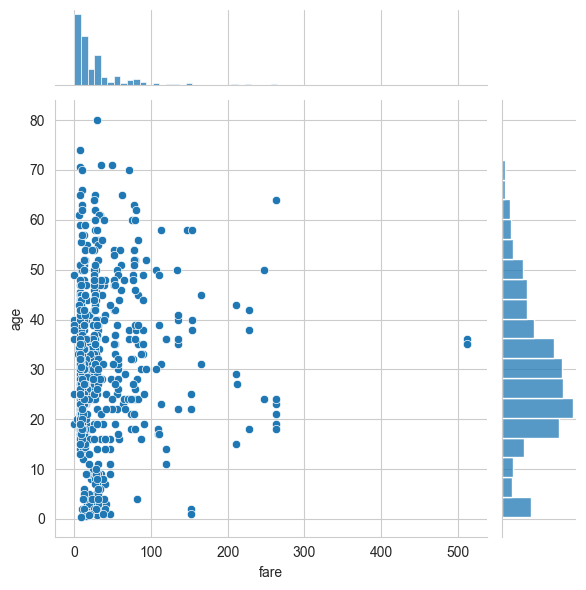

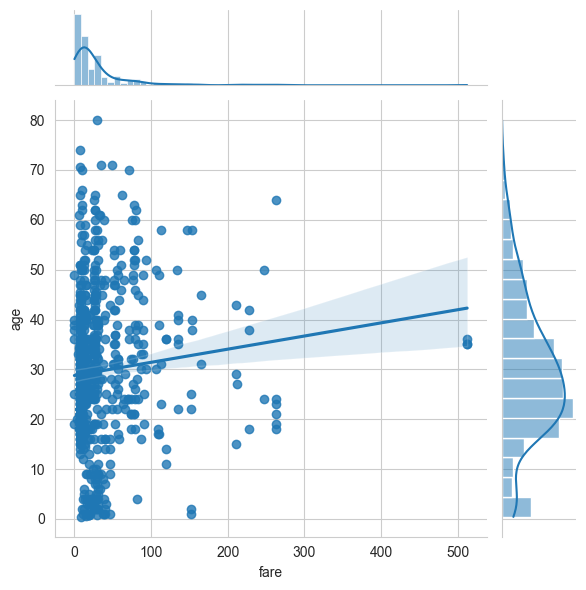

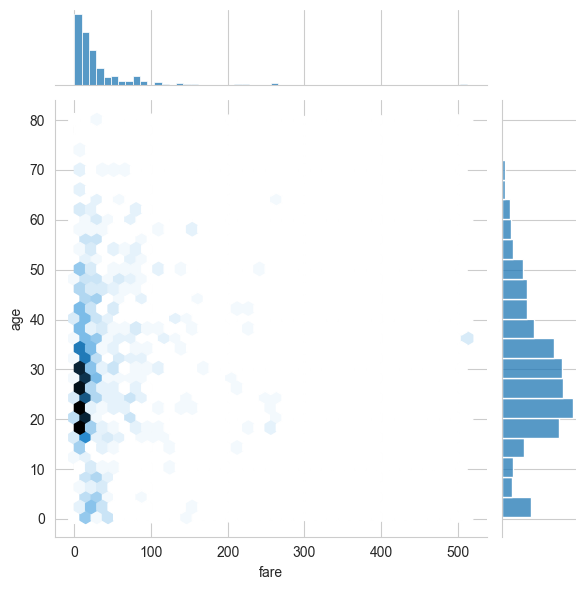

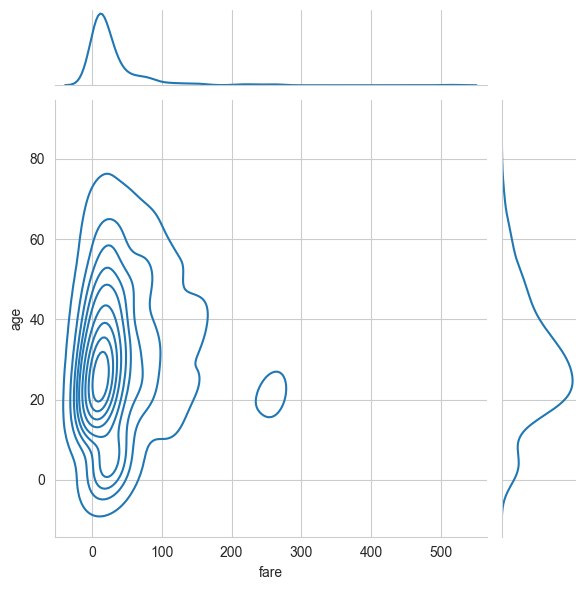

In [31]:
# 산점도
sns.jointplot(
    x = 'fare',
    y = 'age',
    data=titanic,

)

# 회귀선
sns.jointplot(
    x = 'fare',
    y = 'age',
    kind = 'reg',
    data=titanic,
  
)
# 육각그래프
sns.jointplot(
    x = 'fare',
    y = 'age',
    kind = 'hex',
    data=titanic,
  
)
# zjsjf alfwlq
sns.jointplot(
    x = 'fare',
    y = 'age',
    kind = 'kde',
    data=titanic,
  
)

plt.show()